In [25]:
import Parity_Data_Generator
import InputToParityESN
# import ParityToOutputESN
import numpy as np
from pyESN import ESN
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)

N = 20000   # number of datapoints
n = 3       # n-parity
# produce Data
bits, parity, target = Parity_Data_Generator.generateParityData(N, n, randomstate=rng)

# Divide in training and test data
traintest_cutoff = int(np.ceil(0.7 * len(bits)))
train_bits, test_bits = bits[:traintest_cutoff], bits[traintest_cutoff:]
train_parity, test_parity = parity[:traintest_cutoff], parity[traintest_cutoff:]
train_targets, test_targets = target[:traintest_cutoff], target[traintest_cutoff:]


In [12]:
print("### Input-->Parity ###")
# get good configs for a slow ESN
nParityESN = ESN(n_inputs=1,
                          n_outputs=1,
                          n_reservoir=500,  # from 200 onwards test error decreases significantly
                          spectral_radius=0.95,  # from 0.9 the test error is 0.0
                          leak_rate= 0.1,   # adjust leak_rate
                          sparsity=0.95,
                          noise=0.001,
                          input_shift=0,
                          input_scaling=3,  # 3 seems to be fine. Maybe use lower
                          teacher_scaling=1.12,
                          teacher_shift=-0.7,
                          out_activation=np.tanh,
                          inverse_out_activation=np.arctanh,
                          random_state=rng,
                          silent=False)
# print(np.shape(bits),np.shape(parity),np.shape(target))
nParityESN.fit(train_bits, train_parity)
pred_test = nParityESN.predict(test_bits)

#### Rounding
better_pred_test = []           # Maybe don't round and return "true" results from pred_test
for x in pred_test:
    better_pred_test.append(0 if x < 0.5 else 1)
predictedParity = np.array(better_pred_test).reshape(-1,1)

print("Testing error")
print(np.sqrt(np.mean((predictedParity - test_parity) ** 2)))


### Input-->Parity ###
harvesting states...
fitting...
training error:
0.1155734412
Testing error
0.55991814878


In [33]:
def runSomeConfigs(spectral_rad, leak_r):
#     print("Spectral-radius:",spectral_rad, "leak-rate:", leak_r)
    nParityESN = ESN(n_inputs=1,
                          n_outputs=1,
                          n_reservoir=500,  # from 200 onwards test error decreases significantly
                          spectral_radius=spectral_rad,  # from 0.9 the test error is 0.0
                          leak_rate= leak_r,   # adjust leak_rate
                          sparsity=0.95,
                          noise=0.001,
                          input_shift=0,
                          input_scaling=3,  # 3 seems to be fine. Maybe use lower
                          teacher_scaling=1.12,
                          teacher_shift=-0.7,
                          out_activation=np.tanh,
                          inverse_out_activation=np.arctanh,
                          random_state=rng,
                          silent=False)
    # print(np.shape(bits),np.shape(parity),np.shape(target))
    nParityESN.fit(train_bits, train_parity)
    pred_test = nParityESN.predict(test_bits)

    #### Rounding
    better_pred_test = []           # Maybe don't round and return "true" results from pred_test
    for x in pred_test:
        better_pred_test.append(0 if x < 0.5 else 1)
    predictedParity = np.array(better_pred_test).reshape(-1,1)

    print("Testing error")
    test_error = np.sqrt(np.mean((predictedParity - test_parity) ** 2))
    print(test_error)
    return test_error

Spectral-radius: 0.1 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.162695810234
Testing error
0.706753139363
Spectral-radius: 0.25 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.14459909424
Testing error
0.706753139363
Spectral-radius: 0.4 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.134351024607
Testing error
0.599200856697
Spectral-radius: 0.55 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.124290997584
Testing error
0.706293140275
Spectral-radius: 0.7 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.120089151461
Testing error
0.706835671614
Spectral-radius: 0.85 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.114246951431
Testing error
0.707036066973
Spectral-radius: 1.0 Leak-rate: 0.1
harvesting states...
fitting...
training error:
0.117432875191
Testing error
0.523625184014
Spectral-radius: 0.1 Leak-rate: 0.25
harvesting states...
fitting...
training error:
0.140524443036
Te

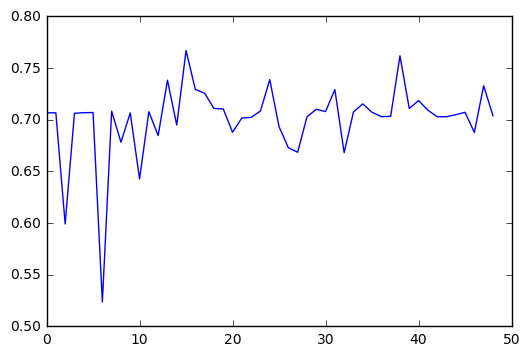

In [34]:
l_rate = np.linspace(0.1, 1.0, num=7)
sp_rad = np.linspace(0.1, 1.0, num=7)

errors = []
for l in l_rate:
    for s in sp_rad:
        print("Spectral-radius:", s, "Leak-rate:", l)
        errors.append(runSomeConfigs(s,l))
        
plt.subplot(111)
plt.plot(errors)
plt.show()

In [37]:
n_errors = np.array(errors).reshape(7,7)
print(np.shape(n_errors))

(7, 7)
